In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
from pycocotools.coco import COCO
import cv2
import numpy as np
import pandas as pd

In [2]:
classes = ["General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]
colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']

In [3]:
pred_dir = '/opt/ml/level2_objectdetection_cv-level2-cv-09/mmdetection/work_dirs/swinT_copy/submission_epoch_12.csv' # data_dir 경로
predictions = pd.read_csv(pred_dir)
predictions

,PredictionString,image_id
0,1 0.95690244 557.821 105.636536 772.80914 352....,test/0000.jpg
1,0 0.40473312 755.66736 633.69635 891.3319 999....,test/0001.jpg
2,0 0.4799485 871.74963 462.24286 1024.0 633.550...,test/0002.jpg
3,9 0.6986285 465.3789 264.84796 882.20215 794.8...,test/0003.jpg
4,0 0.43703544 459.5921 403.917 649.6871 556.685...,test/0004.jpg
...,...,...
4866,0 0.66806626 283.9061 419.5097 669.355 686.8947,test/4866.jpg
4867,0 0.47087654 612.2817 658.89404 774.6058 744.5...,test/4867.jpg
4868,7 0.988698 90.51105 472.16788 771.78656 850.58...,test/4868.jpg
4869,0 0.66825044 0.0 433.55908 1024.0 954.0348 0 0...,test/4869.jpg


In [4]:
predictions.iloc[17][0]

'5 0.48233587 74.63121 101.41565 537.36395 623.47766 '

In [5]:
predictions.iloc[17][1]

'test/0017.jpg'

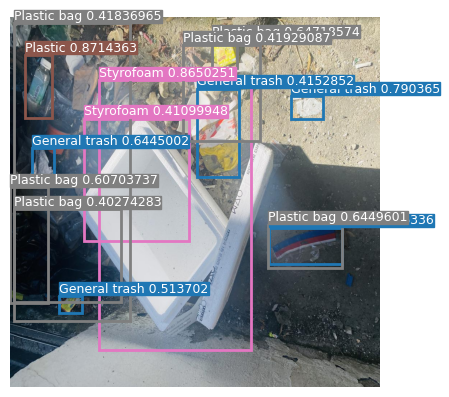

In [8]:
# index 바꿔가면서 사진 확인
index=1085    # 0 ~ 4882

# 이미지 아이디 가져오기
image_file = predictions.iloc[index][1]

pred = predictions.iloc[index][0]
pred = pred.split()

image = cv2.imread(os.path.join('/opt/ml/dataset', image_file))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
image /= 255.0

fig, ax = plt.subplots()
plt.axis('off')
ax.imshow(image)

bboxes = []
bbox = []
for i, v in enumerate(pred):
   bbox.append(v)
   if i % 6 == 5:
      bboxes.append(bbox)
      bbox = []


for box in bboxes:
   label, score, x_min, y_min, x_max, y_max = list(map(float, box))

   label = int(label)
   x = x_min
   y = y_min
   width = x_max - x
   height = y_max - y
   ax.add_patch(
      patches.Rectangle(
         (x, y),                   # (x, y)
         width, height,            # width, height
         edgecolor = colors[label],
         linewidth=2,
         fill=False,
      ))
   label_class = classes[label]
   ax.text(x=x, y=y-10, fontsize=9,s=f'{label_class} {score}', color='white', bbox=dict(facecolor=colors[label], ec=colors[label], alpha=1, pad=0))

plt.show()